# Mixing Models in Geochemistry
**Jordan Lubbers and Chuck Lewis** <br>
*College of Earth, Ocean and Atmospheric Sciences* <br>
*Oregon State University*

# Motivation
This notebook shows how to construct various mixing models in geochemical data for both concentrations and isotope ratios:


We will first go through it by hand and then show how it is done in the ```magmatrace``` module.


For a more in depth explanation of mxing theory we suggest the following references:

- [Albarede (1995): *Introduction to Geochemical Modeling*](https://www.cambridge.org/core/books/introduction-to-geochemical-modeling/020E2B1DCF69C3337C0022CAE419A5DC) Chapter 1 on mass balance, mixing, and fractionation. 

- [Faure 1998: *Principles and Applications of Geochemistry 2$^{nd}$ edition*](https://www.pearson.com/us/higher-education/program/Faure-Principles-and-Applications-of-Geochemistry-2nd-Edition/PGM110956.html) pg. 336 eqns 18.24-18.26 as well as
- [Faure and Mensing (2009): *Isotopes Principles and Applications 3$^{rd}$ edition*](https://www.wiley.com/en-us/Isotopes%3A+Principles+and+Applications%2C+3rd+Edition-p-9780471384373https://www.wiley.com/en-us/Isotopes%3A+Principles+and+Applications%2C+3rd+Edition-p-9780471384373) chapter 16 on Mixing Theory


## Two component mixing
For a two component mixture $M$, comprised of components $A$ and $B$, the concentration (e.g. Sr) of mixture $M$ is defined as (Albarede 1995 eq. 1.1.3):

$$C_M = C_Af_A + C_B(1 - f_A)$$

where $C$ is the concentration and $f$ is the fraction of each component in the mixture.

When investigating mixtures of ratios we use the Albarede (1995):

$$ \left(\frac{C^{i2}}{C^{i1}}\right)_M = \left(\frac{C^{i2}}{C^{i1}}\right)_A{\varphi_A}^{i1} + \left(\frac{C^{i2}}{C^{i1}}\right)_B\left(1 - {\varphi_A}^{i1}\right)$$ 

<br>
<center> where: </center>
<br>
<br>

$$ {\varphi_A}^{i1} = \frac{C^{i1}_Af_a}{C^{i1}_M} $$

We can think of $\varphi$ as the mass fraction of species $i$ for each component in the mixture. Note...ratios may be other isotopic systems (e.g., $\delta^{18}O$, Os, Nd, etc.) or ratios defined by two different elements (e.g. $\frac{FeO}{MgO}$). 


## N component mixing
A mixture of $n$ components will have a concentration (e.g. Sr) dictated by the following relationship:

$$Sr_M = Sr_Af_A + Sr_Bf_B + Sr_Cf_C + ... Sr_nf_n$$ 

Expanding on two component mixtures from above we can get the general form for an $n$ component mixture of ratios (Albarede, 1995 eq. 1.3.1, 1.3.2):

$$  \left(\frac{^{87}Sr}{^{86}Sr}\right)_M = \sum_{j=1}^{n}\left(\frac{^{87}Sr}{^{86}Sr}\right)_j\varphi_j    $$

<br>
<center> where: </center>
<br>
<br>

$$ \varphi_j = \frac{Sr_jf_j}{Sr_M}$$ 

Putting it all together:

$$  \left(\frac{^{87}Sr}{^{86}Sr}\right)_M = \sum_{j=1}^{n}\left(\frac{^{87}Sr}{^{86}Sr}\right)_j\frac{Sr_jf_j}{Sr_M} $$

Again, while we are using Sr isotope notation as an example here, ratios may be other isotopic systems (e.g., $\delta^{18}O$, Os, Nd, etc.) or ratios defined by two different elements (e.g. $\frac{FeO}{MgO}$).


# Coded Examples 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

import pandas as pd
import numpy as np

import magmatrace_current as mt

## Concentration - Ratio

Consider the following example from Albarede (1995) Table 1.6 where we have concentrations and isotope values for Sr from two end-members:

In [2]:
df = pd.DataFrame(
    {"Sr_r": np.array([0.704, 0.712]), "Sr_c": np.array([400, 100]),},
    index=["basalt", "gneiss"],
)
df

,Sr_r,Sr_c
basalt,0.704,400
gneiss,0.712,100


Text(0, 0.5, '$\\frac{^{87}Sr}{^{86}Sr}$')

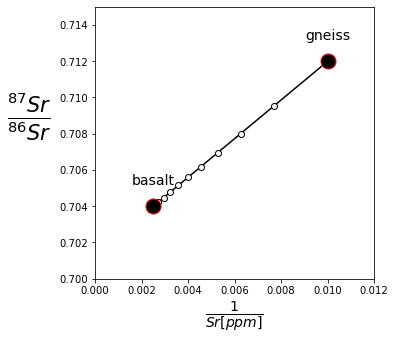

In [3]:
# fraction of gneiss in mixture
f_gneiss = np.arange(0, 1.1, 0.1)


# mixture concentrations
sr_c_mixes = df.loc["gneiss", "Sr_c"] * f_gneiss + df.loc["basalt", "Sr_c"] * (
    1 - f_gneiss
)

# mixture ratio compositions
sr_r_mixes = df.loc["gneiss", "Sr_r"] * (
    (df.loc["gneiss", "Sr_c"] * f_gneiss) / sr_c_mixes
) + df.loc["basalt", "Sr_r"] * (
    (df.loc["basalt", "Sr_c"] * (1 - f_gneiss)) / sr_c_mixes
)

# visualize
fig, ax = plt.subplots(figsize=(5, 5))


ax.plot(
    1 / sr_c_mixes, sr_r_mixes, marker="o", mec="k", mfc="w", c="k",
)

ax.plot(
    1 / df.loc["basalt", "Sr_c"],
    df.loc["basalt"]["Sr_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)
ax.plot(
    1 / df.loc["gneiss", "Sr_c"],
    df.loc["gneiss"]["Sr_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)


for x, y, e in zip(df["Sr_c"], df["Sr_r"], df.index):
    ax.annotate(
        e, xy=(1 / x, y * 1.002), fontsize=14, ha="center", va="center", zorder=10
    )

ax.set_xlim(0, 0.012)
ax.set_ylim(0.7, 0.715)


ax.set_xlabel(r"$\frac{1}{Sr [ppm]}$", fontsize=20)
ax.set_ylabel(
    r"$\frac{^{87}Sr}{^{86}Sr}$", fontsize=30, labelpad=30, rotation="horizontal"
)

## Ratio - Ratio

Again, consider another example from Albarede (1995) Table 1.7a where we have end-member compositions for some major element data from:

In [4]:
df = pd.DataFrame(
    {
        "FeO": np.array([10, 5]),
        "MgO": np.array([10, 1]),
        "CaO": np.array([10, 4]),
        "Na2O": np.array([2, 4]),
    },
    index=["basalt", "gneiss"],
)

df["FeO/MgO"] = df["FeO"] / df["MgO"]
df["Na2O/CaO"] = df["Na2O"] / df["CaO"]

df

,FeO,MgO,CaO,Na2O,FeO/MgO,Na2O/CaO
basalt,10,10,10,2,1.0,0.2
gneiss,5,1,4,4,5.0,1.0


Text(0, 0.5, '$\\frac{Na_2O}{CaO}$')

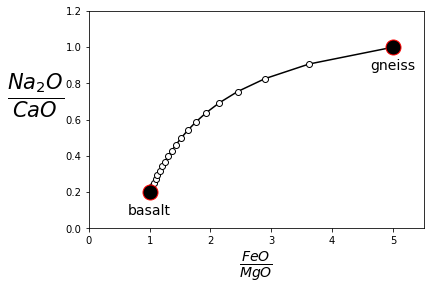

In [5]:
f_gneiss = np.arange(0, 1.05, 0.05)
mg_c_mixes = df.loc["gneiss", "MgO"] * f_gneiss + df.loc["basalt", "MgO"] * (
    1 - f_gneiss
)
ca_c_mixes = df.loc["gneiss", "CaO"] * f_gneiss + df.loc["basalt", "CaO"] * (
    1 - f_gneiss
)

femg_r_mixes = df.loc["gneiss", "FeO/MgO"] * (
    (df.loc["gneiss", "MgO"] * f_gneiss) / mg_c_mixes
) + df.loc["basalt", "FeO/MgO"] * (
    (df.loc["basalt", "MgO"] * (1 - f_gneiss)) / mg_c_mixes
)
naca_r_mixes = df.loc["gneiss", "Na2O/CaO"] * (
    (df.loc["gneiss", "CaO"] * f_gneiss) / ca_c_mixes
) + df.loc["basalt", "Na2O/CaO"] * (
    (df.loc["basalt", "CaO"] * (1 - f_gneiss)) / ca_c_mixes
)


# visualize
fig, ax = plt.subplots()


ax.plot(
    femg_r_mixes, naca_r_mixes, marker="o", mec="k", mfc="w", c="k",
)

ax.plot(
    df.loc["basalt", "FeO/MgO"],
    df.loc["basalt"]["Na2O/CaO"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)
ax.plot(
    df.loc["gneiss", "FeO/MgO"],
    df.loc["gneiss"]["Na2O/CaO"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)


for x, y, e in zip(df["FeO/MgO"], df["Na2O/CaO"], df.index):
    if e == "basalt":
        ax.annotate(
            e, xy=(x, y * 0.5), fontsize=14, ha="center", va="center", zorder=10
        )
    else:
        ax.annotate(
            e, xy=(x, y * 0.9), fontsize=14, ha="center", va="center", zorder=10
        )

ax.set_xlim(0, 5.5)
ax.set_ylim(0, 1.2)


ax.set_xlabel(r"$\frac{FeO}{MgO}$", fontsize=20)
ax.set_ylabel(r"$\frac{Na_2O}{CaO}$", fontsize=30, labelpad=30, rotation="horizontal")

## 3-component mixing with ratios
To quote Albarede (1995):
> Ratio-ratio relationships in mixtures inolving three or more end-members are no more difficult to handle than binary mixtures. Curved triangles are obtained in binary plots and curious surfaces may be drawn in a 3-D space using 3-D plotting programs. Different concentration ratios may produce widely different triangles and singular points may be created for a particular range of parameters.

Consider the following example from Albarede (1995), Table 1.10 where we have Sr and Nd isotopic compositions for different mantle end-members.

In [6]:
df = pd.DataFrame(
    {
        "Sr_r": np.array([0.703, 0.705, 0.710]),
        "Sr_c": np.array([40, 400, 20]),
        "Nd_r": np.array([0.5131, 0.5118, 0.5121]),
        "Nd_c": np.array([5, 10, 10]),
    },
    index=["DM", "EM1", "EM2"],
)
df

,Sr_r,Sr_c,Nd_r,Nd_c
DM,0.703,40,0.5131,5
EM1,0.705,400,0.5118,10
EM2,0.710,20,0.5121,10


For any given combination of $f$ values (e.g., $f_{DM}$, $f_{EM1}$, $f_{EM2}$) we can use the Albarede equation 1.3.1 to calculate the ratio composition ($R_M$) of our mixture the following way:

$$ R_M = R_{DM}\frac{C_{DM}f_{DM}}{C_M} + R_{EM1}\frac{C_{EM1}f_{EM1}}{C_M} + R_{EM2}\frac{C_{EM2}f_{EM2}}{C_M} $$

with an array of $f$ values for each of the end-members as follows:

```python
f = np.arange(0,1.1,.1)
```

Expanding on this, we can think of our mixing model as a mesh in 2-D space that is comprised of a point for each combination of the three $f$ arrays that sums to 1. To do this, we get combinations of all possible f values and then filter them where the sum of all three components is 1.

```python
# get all possible combinations
a = np.array(np.meshgrid(f, f, f)).T.reshape(-1,3)

# filter for where they sum to unity
f_vals = a[a.sum(axis = 1) == 1]
```

For a mixing model that is spaced at 10% increments of each component this is 62 points. For a mixing model that is spaced at 5% increments this number increases to 217, and for a mixing model that is spaced at 1% increments this is 5027.

In [7]:
# f value array that will be used for each component
f = np.arange(0, 1.01, 0.01)

# all possible combinations for three f arrays
a = np.array(np.meshgrid(f, f, f)).T.reshape(-1, 3)

# where the combinations sum to 1
f_vals = a[a.sum(axis=1) == 1]

# concentrations of the mixture for Sr and Nd
Sr_mixes = (
    df.loc["DM", "Sr_c"] * f_vals[:, 0]
    + df.loc["EM1", "Sr_c"] * f_vals[:, 1]
    + df.loc["EM2", "Sr_c"] * f_vals[:, 2]
)
Nd_mixes = (
    df.loc["DM", "Nd_c"] * f_vals[:, 0]
    + df.loc["EM1", "Nd_c"] * f_vals[:, 1]
    + df.loc["EM2", "Nd_c"] * f_vals[:, 2]
)

# ratio values of the mixture for 87Sr/86Sr and 144Nd/143Nd
Sr_r_mixes = (
    df.loc["DM", "Sr_r"] * ((f_vals[:, 0] * df.loc["DM", "Sr_c"]) / Sr_mixes)
    + df.loc["EM1", "Sr_r"] * ((f_vals[:, 1] * df.loc["EM1", "Sr_c"]) / Sr_mixes)
    + df.loc["EM2", "Sr_r"] * ((f_vals[:, 2] * df.loc["EM2", "Sr_c"]) / Sr_mixes)
)

Nd_r_mixes = (
    df.loc["DM", "Nd_r"] * ((f_vals[:, 0] * df.loc["DM", "Nd_c"]) / Nd_mixes)
    + df.loc["EM1", "Nd_r"] * ((f_vals[:, 1] * df.loc["EM1", "Nd_c"]) / Nd_mixes)
    + df.loc["EM2", "Nd_r"] * ((f_vals[:, 2] * df.loc["EM2", "Nd_c"]) / Nd_mixes)
)


# Combine it all into one dataframe
results = pd.DataFrame(
    {
        "f_DM": f_vals[:, 0],
        "f_EM1": f_vals[:, 1],
        "f_EM2": f_vals[:, 2],
        "Sr_c_mix": Sr_mixes,
        "Nd_c_mix": Nd_mixes,
        "Sr_r_mix": Sr_r_mixes,
        "Nd_r_mix": Nd_r_mixes,
    }
)
print("points in mixing mesh: {} \nfor {} f points".format(f_vals.shape[0], len(f)))
results.head()

points in mixing mesh: 5027 
for 101 f points


,f_DM,f_EM1,f_EM2,Sr_c_mix,Nd_c_mix,Sr_r_mix,Nd_r_mix
0,0.00,1.00,0.0,400.0,10.00,0.705000,0.511800
1,0.01,0.99,0.0,396.4,9.95,0.704998,0.511807
2,0.02,0.98,0.0,392.8,9.90,0.704996,0.511813
3,0.03,0.97,0.0,389.2,9.85,0.704994,0.511820
4,0.04,0.96,0.0,385.6,9.80,0.704992,0.511827


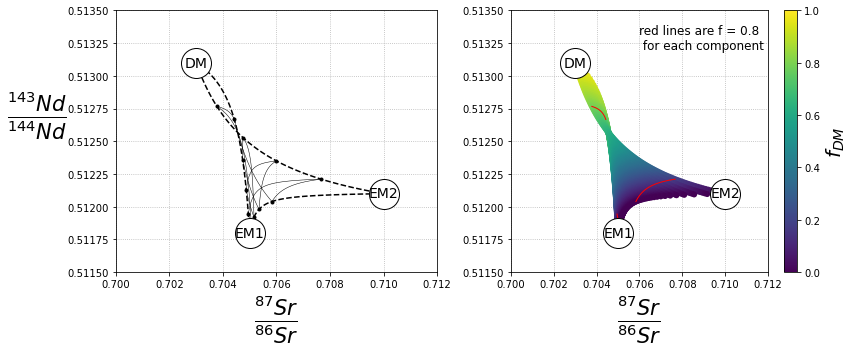

In [8]:
DM = results.loc[results["f_DM"] == 0]
EM1 = results.loc[results["f_EM1"] == 0]
EM2 = results.loc[results["f_EM2"] == 0]


fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(
    DM["Sr_r_mix"], DM["Nd_r_mix"], "k--.", markevery=20,
)
ax[0].plot(
    EM1["Sr_r_mix"], EM1["Nd_r_mix"], "k--.", markevery=20,
)
ax[0].plot(
    EM2["Sr_r_mix"], EM2["Nd_r_mix"], "k--.", markevery=20,
)

ax[0].plot(
    df["Sr_r"], df["Nd_r"], marker="o", ls="", ms=30, mec="k", mfc="w", zorder=10
)

for val in np.array([0.2, 0.4, 0.6, 0.8]):

    ax[0].plot(
        results[results["f_DM"] == val]["Sr_r_mix"],
        results[results["f_DM"] == val]["Nd_r_mix"],
        "k-",
        lw=0.5,
    )
    ax[0].plot(
        results[results["f_EM1"] == val]["Sr_r_mix"],
        results[results["f_EM1"] == val]["Nd_r_mix"],
        "k-",
        lw=0.5,
    )
    ax[0].plot(
        results[results["f_EM2"] == val]["Sr_r_mix"],
        results[results["f_EM2"] == val]["Nd_r_mix"],
        "k-",
        lw=0.5,
    )


for x, y, e in zip(df["Sr_r"], df["Nd_r"], df.index):
    ax[0].annotate(e, xy=(x, y), fontsize=14, ha="center", va="center", zorder=10)

ax[0].grid(ls=":", zorder=0)

ax[0].set_xlim(0.7, 0.712)
ax[0].set_ylim(0.5115, 0.5135)

ax[0].set_xlabel(r"$\frac{^{87}Sr}{^{86}Sr}$", fontsize=30)
ax[0].set_ylabel(
    r"$\frac{^{143}Nd}{^{144}Nd}$", fontsize=30, labelpad=30, rotation="horizontal"
)

ax[1].grid(ls=":", zorder=0)
s = ax[1].scatter(
    results["Sr_r_mix"], results["Nd_r_mix"], ec="none", c=results["f_DM"], zorder=2
)

cbar = fig.colorbar(s, ax=ax[1])
cbar.set_label(label="$f_{DM}$", fontsize=20)

# plotting the 80% line for each component
for val in np.array([0.8]):

    ax[1].plot(
        results[results["f_DM"] == val]["Sr_r_mix"],
        results[results["f_DM"] == val]["Nd_r_mix"],
        "r-",
        lw=1,
    )
    ax[1].plot(
        results[results["f_EM1"] == val]["Sr_r_mix"],
        results[results["f_EM1"] == val]["Nd_r_mix"],
        "r-",
        lw=1,
    )
    ax[1].plot(
        results[results["f_EM2"] == val]["Sr_r_mix"],
        results[results["f_EM2"] == val]["Nd_r_mix"],
        "r-",
        lw=1,
    )

ax[1].plot(
    df["Sr_r"], df["Nd_r"], marker="o", ls="", ms=30, mec="k", mfc="White", zorder=10
)

for x, y, e in zip(df["Sr_r"], df["Nd_r"], df.index):
    ax[1].annotate(e, xy=(x, y), fontsize=14, ha="center", va="center", zorder=10)

ax[1].set_xlim(0.7, 0.712)
ax[1].set_ylim(0.5115, 0.5135)

ax[1].set_xlabel(r"$\frac{^{87}Sr}{^{86}Sr}$", fontsize=30)
ax[1].text(
    0.5,
    0.85,
    "red lines are f = 0.8 \n for each component",
    transform=ax[1].transAxes,
    fontsize=12,
)


fig.tight_layout()

# Using ```magmatrace```

The ```magmatrace``` module has a function, ```ratio_mixing```, designed to calculate concentrations of mixtures and ratio compositions of mixtures using Albarede (1995)'s Equation 1.3.1. 

From the docs:

```
ratio_mixing(df, n_components, resolution=0.1)
    Mixing of ratios as described by Albarede 1995
    Introduction to Geochemical Modeling equation 1.3.1
    
    Inputs:
    
    df | pandas DataFrame
    
    DataFrame of inputs. should be formatted as follows:
    
    For 2 component mixing:
    
    Index|Element1_c|Element1_r|Element2_c|Element2_r
    -------------------------------------------------
      A  |          |          |          |
    -------------------------------------------------  
      B  |          |          |          |
    
      
    
    For 3 component mixing:
    
    Index|Element1_c|Element1_r|Element2_c|Element2_r
    -------------------------------------------------
      A  |          |          |          |
    -------------------------------------------------  
      B  |          |          |          |
    -------------------------------------------------
      C  |          |          |          |
      
      
    Where the name of each component is the index of the dataframe and the 
    concentration and ratio columns for each elemental species contain "_c" and "_r" 
    somewhere in the column header, respectively. 
    
    n_components | int
    
    Number of end-member components (either 2 or 3)
    
    resolution | float
    
    The resolution you want to run your mixing model at. This is a number between 0.01 
    and 0.5. This is how far apart to space points in the eventual mixing mesh
    (e.g. .1 will return a mixing mesh spaced by 1O% increments for each component)
    
    Default is 0.1
    
    
    
    
    Returns:
    
    results | pandas DataFrame
    
    The results of the mixing model that is n x 7 in shape:
    
    f_A|f_B|f_C|Element1_c_mix|Element2_c_mix|Element1_r_mix|Element2_r_mix
    -----------------------------------------------------------------------
    
    Where f columns are fraction of each component in the mixture and other columns
    Are for the concentrations and ratios of the mixture for each respective combination
    of f values
```

Below we will create some figures from Chapter 1 in Albarede 1995, similar to above, only now we'll use the ```ratio_mixing``` function


In [9]:
table_1_6 = pd.DataFrame(
    {"Sr_r": np.array([0.704, 0.712]), "Sr_c": np.array([400, 100]),},
    index=["basalt", "gneiss"],
)
table_1_6

,Sr_r,Sr_c
basalt,0.704,400
gneiss,0.712,100


In [10]:
# Call the function...that's it!
results1 = mt.ratio_mixing(table_1_6, n_components=2, resolution=0.05)
results1.head()

,f_basalt,f_gneiss,Sr_c_mix,Sr_r_mix
0,0.00,1.00,100.0,0.712000
1,0.05,0.95,115.0,0.710609
2,0.10,0.90,130.0,0.709538
3,0.15,0.85,145.0,0.708690
4,0.20,0.80,160.0,0.708000


Text(0.5, 1.0, 'Figure 1.5 Albarede (1995)')

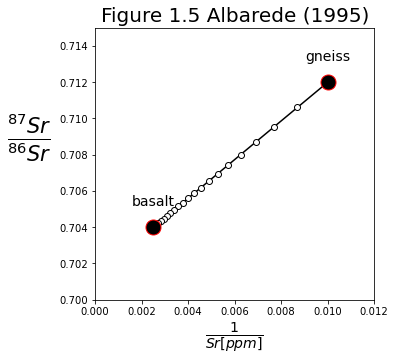

In [11]:

# visualize
fig, ax = plt.subplots(figsize=(5, 5))


ax.plot(
    1 / results1["Sr_c_mix"], results1["Sr_r_mix"], marker="o", mec="k", mfc="w", c="k",
)

ax.plot(
    1 / table_1_6.loc["basalt", "Sr_c"],
    table_1_6.loc["basalt"]["Sr_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)
ax.plot(
    1 / table_1_6.loc["gneiss", "Sr_c"],
    table_1_6.loc["gneiss"]["Sr_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)


for x, y, e in zip(table_1_6["Sr_c"], table_1_6["Sr_r"], table_1_6.index):
    ax.annotate(
        e, xy=(1 / x, y * 1.002), fontsize=14, ha="center", va="center", zorder=10
    )

ax.set_xlim(0, 0.012)
ax.set_ylim(0.7, 0.715)


ax.set_xlabel(r"$\frac{1}{Sr [ppm]}$", fontsize=20)
ax.set_ylabel(
    r"$\frac{^{87}Sr}{^{86}Sr}$", fontsize=30, labelpad=30, rotation="horizontal"
)

ax.set_title('Figure 1.5 Albarede (1995)',fontsize = 20)

In [12]:
# denote columns to be used for calculating phi paramter with "_c"
# remember from Albarede 1.3.2 above that the phi parameter is calculated
# using the denominator of the ratio (in this case the MgO and CaO columns)

table_1_7 = pd.DataFrame(
    {
        "FeO": np.array([10, 5]),
        "MgO_c": np.array([10, 1]),
        "CaO_c": np.array([10, 4]),
        "Na2O": np.array([2, 4]),
    },
    index=["basalt", "gneiss"],
)

table_1_7["FeO/MgO_r"] = table_1_7["FeO"] / table_1_7["MgO_c"]
table_1_7["Na2O/CaO_r"] = table_1_7["Na2O"] / table_1_7["CaO_c"]
table_1_7

,FeO,MgO_c,CaO_c,Na2O,FeO/MgO_r,Na2O/CaO_r
basalt,10,10,10,2,1.0,0.2
gneiss,5,1,4,4,5.0,1.0


In [13]:
results2 = mt.ratio_mixing(table_1_7, n_components=2, resolution=0.05)
results2.head()

,f_basalt,f_gneiss,MgO_c_mix,CaO_c_mix,FeO/MgO_r_mix,Na2O/CaO_r_mix
0,0.00,1.00,1.00,4.0,5.000000,1.000000
1,0.05,0.95,1.45,4.3,3.620690,0.906977
2,0.10,0.90,1.90,4.6,2.894737,0.826087
3,0.15,0.85,2.35,4.9,2.446809,0.755102
4,0.20,0.80,2.80,5.2,2.142857,0.692308


Text(0.5, 1.0, 'Figure 1.6 Albarede (1995)')

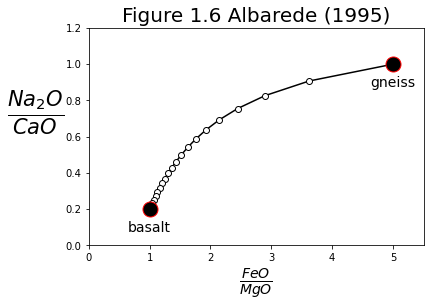

In [14]:
# visualize
fig, ax = plt.subplots()


ax.plot(
    results2["FeO/MgO_r_mix"],
    results2["Na2O/CaO_r_mix"],
    marker="o",
    mec="k",
    mfc="w",
    c="k",
)

ax.plot(
    table_1_7.loc["basalt", "FeO/MgO_r"],
    table_1_7.loc["basalt"]["Na2O/CaO_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)
ax.plot(
    table_1_7.loc["gneiss", "FeO/MgO_r"],
    table_1_7.loc["gneiss"]["Na2O/CaO_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)


for x, y, e in zip(table_1_7["FeO/MgO_r"], table_1_7["Na2O/CaO_r"], table_1_7.index):
    if e == "basalt":
        ax.annotate(
            e, xy=(x, y * 0.5), fontsize=14, ha="center", va="center", zorder=10
        )
    else:
        ax.annotate(
            e, xy=(x, y * 0.9), fontsize=14, ha="center", va="center", zorder=10
        )

ax.set_xlim(0, 5.5)
ax.set_ylim(0, 1.2)


ax.set_xlabel(r"$\frac{FeO}{MgO}$", fontsize=20)
ax.set_ylabel(r"$\frac{Na_2O}{CaO}$", fontsize=30, labelpad=30, rotation="horizontal")
ax.set_title('Figure 1.6 Albarede (1995)',fontsize = 20)

In [15]:
table_1_8 = table_1_10 = pd.DataFrame(
    {
        "Sr_r": np.array([.703,.710]),
        "Sr_c": np.array([100,200]),
        "Nd_r": np.array([.513,.511]),
        "Nd_c": np.array([2,20]),
    },
    index=["basalt", "gneiss"],
)
table_1_8

,Sr_r,Sr_c,Nd_r,Nd_c
basalt,0.703,100,0.513,2
gneiss,0.710,200,0.511,20


In [16]:
results4 = mt.ratio_mixing(table_1_8,n_components = 2,resolution = .05)
results4.head()

,f_basalt,f_gneiss,Sr_c_mix,Nd_c_mix,Sr_r_mix,Nd_r_mix
0,0.00,1.00,200.0,20.0,0.710000,0.511000
1,0.05,0.95,195.0,19.1,0.709821,0.511010
2,0.10,0.90,190.0,18.2,0.709632,0.511022
3,0.15,0.85,185.0,17.3,0.709432,0.511035
4,0.20,0.80,180.0,16.4,0.709222,0.511049


Text(0.5, 1.0, 'Figure 1.7 Albarede (1995)')

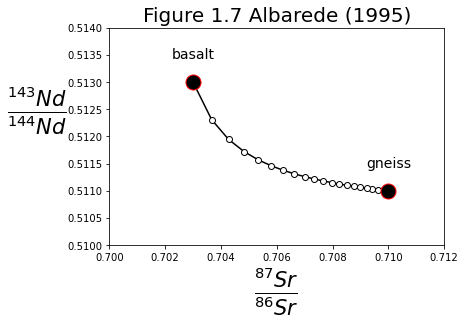

In [17]:
# visualize
fig, ax = plt.subplots()


ax.plot(
    results4["Sr_r_mix"],
    results4["Nd_r_mix"],
    marker="o",
    mec="k",
    mfc="w",
    c="k",
)

ax.plot(
    table_1_8.loc["basalt", "Sr_r"],
    table_1_8.loc["basalt"]["Nd_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)
ax.plot(
    table_1_8.loc["gneiss", "Sr_r"],
    table_1_8.loc["gneiss"]["Nd_r"],
    marker="o",
    ms="15",
    mfc="k",
    mec="r",
)


for x, y, e in zip(table_1_8["Sr_r"], table_1_8["Nd_r"], table_1_8.index):
    ax.annotate(
        e, xy=(x, y*1.001), fontsize=14, ha="center", va="center", zorder=10
    )
 

ax.set_xlim(.7,.712)
ax.set_ylim(.510,.514)


ax.set_xlabel(r"$\frac{^{87}Sr}{^{86}Sr}$", fontsize=30)
ax.set_ylabel(
    r"$\frac{^{143}Nd}{^{144}Nd}$", fontsize=30, labelpad=30, rotation="horizontal"
)
ax.set_title('Figure 1.7 Albarede (1995)',fontsize = 20)

In [18]:
table_1_10 = pd.DataFrame(
    {
        "Sr_r": np.array([0.703, 0.705, 0.710]),
        "Sr_c": np.array([40, 400, 20]),
        "Nd_r": np.array([0.5131, 0.5118, 0.5121]),
        "Nd_c": np.array([5, 10, 10]),
    },
    index=["DM", "EM1", "EM2"],
)
table_1_10

,Sr_r,Sr_c,Nd_r,Nd_c
DM,0.703,40,0.5131,5
EM1,0.705,400,0.5118,10
EM2,0.710,20,0.5121,10


In [19]:
results3 = mt.ratio_mixing(table_1_10, n_components=3, resolution=0.01)
results3.head()

,f_DM,f_EM1,f_EM2,Sr_c_mix,Nd_c_mix,Sr_r_mix,Nd_r_mix
0,0.00,1.00,0.0,400.0,10.00,0.705000,0.511800
1,0.01,0.99,0.0,396.4,9.95,0.704998,0.511807
2,0.02,0.98,0.0,392.8,9.90,0.704996,0.511813
3,0.03,0.97,0.0,389.2,9.85,0.704994,0.511820
4,0.04,0.96,0.0,385.6,9.80,0.704992,0.511827


Text(0.5, 1.0, 'Figure 1.9 Albarede (1995)')

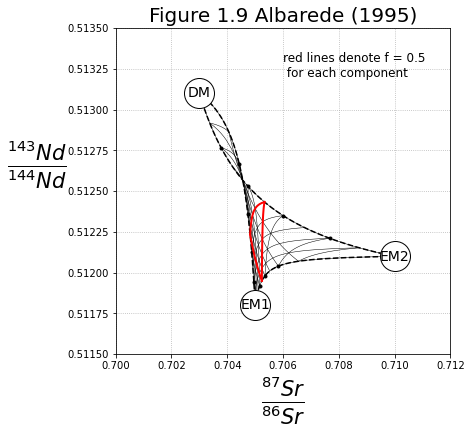

In [20]:
DM = results3.loc[results["f_DM"] == 0]
EM1 = results3.loc[results["f_EM1"] == 0]
EM2 = results3.loc[results["f_EM2"] == 0]


fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(
    DM["Sr_r_mix"], DM["Nd_r_mix"], "k--.", markevery=20,
)
ax.plot(
    EM1["Sr_r_mix"], EM1["Nd_r_mix"], "k--.", markevery=20,
)
ax.plot(
    EM2["Sr_r_mix"], EM2["Nd_r_mix"], "k--.", markevery=20,
)

ax.plot(
    table_1_10["Sr_r"],
    table_1_10["Nd_r"],
    marker="o",
    ls="",
    ms=30,
    mec="k",
    mfc="w",
    zorder=10,
)

highlight = 0.5
for val in np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]):

    ax.plot(
        results3[results3["f_DM"] == val]["Sr_r_mix"],
        results3[results3["f_DM"] == val]["Nd_r_mix"],
        "k-",
        lw=0.5,
    )
    ax.plot(
        results[results["f_EM1"] == val]["Sr_r_mix"],
        results[results["f_EM1"] == val]["Nd_r_mix"],
        "k-",
        lw=0.5,
    )
    ax.plot(
        results3[results3["f_EM2"] == val]["Sr_r_mix"],
        results3[results3["f_EM2"] == val]["Nd_r_mix"],
        "k-",
        lw=0.5,
    )

    if val == highlight:

        ax.plot(
            results3[results3["f_DM"] == val]["Sr_r_mix"],
            results3[results3["f_DM"] == val]["Nd_r_mix"],
            "r-",
            lw=2,
        )
        ax.plot(
            results[results["f_EM1"] == val]["Sr_r_mix"],
            results[results["f_EM1"] == val]["Nd_r_mix"],
            "r-",
            lw=2,
        )
        ax.plot(
            results3[results3["f_EM2"] == val]["Sr_r_mix"],
            results3[results3["f_EM2"] == val]["Nd_r_mix"],
            "r-",
            lw=2,
        )


for x, y, e in zip(table_1_10["Sr_r"], table_1_10["Nd_r"], table_1_10.index):
    ax.annotate(e, xy=(x, y), fontsize=14, ha="center", va="center", zorder=10)

ax.grid(ls=":", zorder=0)

ax.set_xlim(0.7, 0.712)
ax.set_ylim(0.5115, 0.5135)

ax.set_xlabel(r"$\frac{^{87}Sr}{^{86}Sr}$", fontsize=30)
ax.set_ylabel(
    r"$\frac{^{143}Nd}{^{144}Nd}$", fontsize=30, labelpad=30, rotation="horizontal"
)

ax.text(
    0.5,
    0.85,
    "red lines denote f = {} \n for each component".format(highlight),
    transform=ax.transAxes,
    fontsize=12,
)
ax.set_title('Figure 1.9 Albarede (1995)',fontsize = 20)